# Nx versus T and OA

In [1]:
%load_ext autoreload

%autoreload 2

In [2]:
from pathlib import Path

from bs_fdbck.util.BSOA_datamanip import ds2df_inc_preprocessing
from bs_fdbck.util.collocate.collocateLONLAToutput import CollocateLONLATout
import useful_scit.util.log as log

from bs_fdbck.util.plot.BSOA_plots import make_cool_grid, plot_scatter

log.ger.setLevel(log.log.INFO)
import time
import xarray as xr
import matplotlib.pyplot as plt

 from pathlib import Path 
 Path(path).mkdir(exist_ok=True, parents=True)
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/data_info/area_defs.csv


In [3]:

import numpy as np



In [4]:
plot_path = Path('Plots')

In [5]:
def make_fn_scat(case, v_x, v_y):
    _x = v_x.split('(')[0]
    _y = v_y.split('(')[0]
    f = f'scat_pertSize2_{case}_{_x}_{_y}.png'
    return plot_path /f

In [6]:
plot_path.mkdir(exist_ok=True, parents=True)

# Load observational data: 

In [7]:
import pandas as pd

In [8]:
from bs_fdbck.constants import measurements_path

In [9]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1 = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(6))

df_hyy_1.head()

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )



In [10]:
from bs_fdbck.util.EBAS_data import get_ebas_dataset_Nx_daily_JA_median_df



#ds_ebas_Nx = get_ebas_dataset_with_Nx()

df_ebas_Nx, ds_ebas_Nx = get_ebas_dataset_Nx_daily_JA_median_df()

Importing files: 
[PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20120101000000.20181205100800.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20130101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20140101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20150101000000.20220222151057.dmps.particle_number_size_distribution.pm10.1y.1h.FI03L_UHEL_DMPS_HYY_01.FI03L__TRY_TDMPS.lev2.nc'), PosixPath('/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/Data/EBAS/raw_data/SMR/FI0050R.20160101000000.2022022

/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:199: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_JA.mean()
/proj/bolinc/users/x_sarbl/analysis/BS-FDBCK/bs_fdbck/util/EBAS_data/__init__.py:202: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_JA.median())


In [11]:
fn = measurements_path /'SourceData_Yli_Juuti2021.xls'

df_hyy_1y = pd.read_excel(fn, sheet_name=0, header=2, usecols=range(7,12),nrows=7)

df_hyy_1y.head()
df_hyy_1y= df_hyy_1y.rename({'year.1':'year',
                            'T (degree C).1':'T (degree C)',
                             'OA (microgram m^-3).1':'OA (microgram m^-3)',
                             'N100 (cm^-3).1':'N100 (cm^-3)'
                            }, axis=1)
#df_hyy_1y['year'] = pd.to_datetime(df_hyy_1y['year'].apply(x:str(x)))

df_hyy_1y

/home/x_sarbl/miniconda3/envs/env_analys/lib/python3.8/site-packages/pandas/io/excel/_base.py:1272: FutureWarning: Defining usecols with out of bounds indices is deprecated and will raise a ParserError in a future version.
  return self._reader.parse(


,year,T (degree C),OA (microgram m^-3),N100 (cm^-3)
0,2012,14.819834,2.286611,485.015920
1,2013,16.061833,2.266324,458.851509
2,2014,18.469334,4.102861,706.239261
3,2015,14.949500,2.167607,499.026618
4,2016,13.959500,1.693031,418.417730
5,2017,13.619333,1.845648,409.297699
6,2018,17.848833,3.366803,770.183131


In [12]:
df_hyy_1y['year'] = df_hyy_1y['year'].apply(lambda x:f'{x:.0f}')

df_hyy_1y['date'] = df_hyy_1y['year']
df_hyy_1y = df_hyy_1y.set_index('date')

df_hyy_1['date'] = df_hyy_1.apply(lambda x: f'{x.year:.0f}-{x.month:02.0f}-{x.day:02.0f}', axis=1)

df_hyy_1['date'] = pd.to_datetime(df_hyy_1['date'] )


df_hyy_1 = df_hyy_1.set_index('date')

In [13]:
df_hyy_1.index = df_hyy_1.index.rename('time')

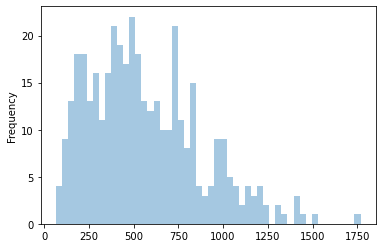

In [14]:
df_hyy_1['N100 (cm^-3)'].plot.hist(bins=50, alpha=0.4, label='obs')

plt.show()



## Why is my method 16% off their method? Is it integration?

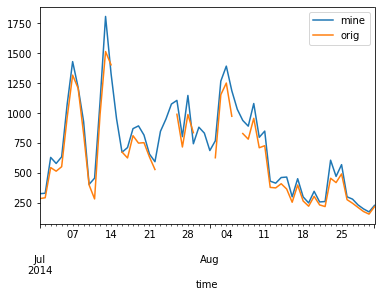

1.13207410632531


In [15]:

df_joint_hyy = pd.merge(df_ebas_Nx, df_hyy_1, left_index=True, right_index=True)
(df_joint_hyy['N100']).loc['2014-07':'2014-09'].plot(label='mine')
(df_joint_hyy['N100 (cm^-3)']).loc['2014-07':'2014-09'].plot(label='orig')
plt.legend()
plt.show()



print(df_joint_hyy['N100'][df_joint_hyy['N100 (cm^-3)'].notnull()].mean()/df_joint_hyy['N100 (cm^-3)'].mean())

# Read in model data:

## Settings:

In [16]:
nr_of_bins = 5
maxDiameter = 39.6  #    23.6 #e-9
minDiameter = 5.0  # e-9
history_field='.h1.'

In [17]:
from_t = '2012-01-01'
to_t = '2015-01-01'

## Cases:

In [18]:
cases_inc_Y = ['OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full']#'SECTv21_ctrl_def','SECTv11_noresm2_ctrl', 'SECTv11_ctrl_fbvoc','SECTv11_noresm2_adj','SECTv11_noresm2_eq18']#'SECTv11_noresm2_NFHIST']#'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']#,'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']
cases_orig = ['OsloAero_intBVOC_f19_f19_mg17_full']#, 'noSECTv21_ox_ricc']#'noSECTv11_noresm2_ricc', 'noSECTv11_noresm2_ctrl', 'noSECTv11_ctrl_fbvoc','noSECTv11_ctrl']#'noSECTv11_noresm2_NFHIST']#'noSECTv11_ctrl_fbvoc'] #/no SECTv11_ctrl

In [19]:
case_mod = cases_orig[0]

In [20]:
 
log.ger.info(f'TIMES:****: {from_t} {to_t}')

2022-04-22 10:38:49,652 useful_scit  INFO     TIMES:****: 2012-01-01 2015-01-01


2022-04-22 10:38:49,652 useful_scit  INFO     TIMES:****: 2012-01-01 2015-01-01


## Variables 

In [21]:
varl =['N100','SOA_NA','SOA_A1','SO4_NA','DOD500','DOD440','ACTREL',#'TGCLDLWP',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','FSNSC',
       'NUCLRATE','NCONC01','NCONC02','NCONC03','NCONC04','NCONC05','NCONC06','NCONC07',
       'NCONC08','NCONC09','NCONC10','NCONC11','NCONC12','NCONC13','NCONC14','SIGMA01',
       'SIGMA02','SIGMA03','SIGMA04','SIGMA05','SIGMA06','SIGMA07','SIGMA08','SIGMA09',
       'SIGMA10','SIGMA11','SIGMA12','SIGMA13','SIGMA14','NMR01','NMR02','NMR03','NMR04',
       'NMR05','NMR06','NMR07','NMR08','NMR09','NMR10','NMR11','NMR12','NMR13','NMR14', 
      'FSNS','FSDS_DRF','T','GR','GRH2SO4','GRSOA','TGCLDCWP','U','V', 'SO2','isoprene',
       'monoterp','GS_SO2', 'GS_H2SO4','GS_monoterp','GS_isoprene']


varl =['N100','DOD500','DOD440','ACTREL',#,'SOA_A1',
       'H2SO4','SOA_LV','COAGNUCL','FORMRATE','T',
       'NCONC01','N50','N150','N200',
      
      'SOA_NA','SOA_A1','OM_NI','OM_AI','OM_AC','SO4_NA','SO4_A1','SO4_A2','SO4_AC','SO4_PR',
      'BC_N','BC_AX','BC_NI','BC_A','BC_AI','BC_AC','SS_A1','SS_A2','SS_A3','DST_A2','DST_A3', 
      ] 

In [22]:
for case_name in cases_inc_Y:
    varlist = varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')
for case_name in cases_orig:
    varlist = varl# list_sized_vars_noresm
    c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    if c.check_if_load_raw_necessary(varlist ):
        time1 = time.time()
        a = c.make_station_data_merge_monthly(varlist)
        print(a)

        time2 = time.time()
        print('DONE : took {:.3f} s'.format( (time2-time1)))
    else:
        print('UUUPS')

UUUPS
UUUPS


In [23]:
dic_ds = dict()
for ca in cases_orig + cases_inc_Y:
    c = CollocateLONLATout(ca, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    ds = c.get_collocated_dataset(varl)
    if 'location' in ds.coords:
        ds = ds.rename({'location':'station'})
    dic_ds[ca]=ds

for ca in cases_orig + cases_inc_Y:
    dic_ds[ca] = dic_ds[ca].sel(station='SMR')

2022-04-22 10:38:50,394 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_full_2012-01

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/N100_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_f19_f19_mg17_full/H2SO4_OsloAero_intBVOC_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_s

2022-04-22 10:38:51,609 useful_scit  INFO     Opening: [//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full/N100_OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc,//proj/bolinc/users/x_sarbl/analysis/Output_data_B

//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full/N100_OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full/DOD500_OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full/DOD440_OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full/ACTREL_OsloAero_intBVOC_pertSizeDist2_f19_f19_mg17_full_2012-01-01_2015-01-01_hour_locations.nc
//proj/bolinc/users/x_sarbl/analysis/Output_data_BS-FDBCK/collocated_ds/NorESM/OsloAero_intBVOC_pertSizeDi

# Functions:

In [24]:
R = 287.058
pressure = 1000. #hPa
kg2ug = 1e9

In [25]:
case_mod

'OsloAero_intBVOC_f19_f19_mg17_full'

In [31]:
for ca in dic_ds.keys():
    dic_ds[ca].load()

In [28]:
dic_ds[case_mod]

<xarray.Dataset>
Dimensions:   (time: 26304)
Coordinates:
  * time      (time) datetime64[ns] 2012-01-02 ... 2015-01-01T23:00:00
    station   <U3 'SMR'
    lev       float64 992.6
Data variables: (12/41)
    ACTREL    (time) float32 dask.array<chunksize=(26304,), meta=np.ndarray>
    BC_A      (time) float32 dask.array<chunksize=(26304,), meta=np.ndarray>
    BC_AC     (time) float32 dask.array<chunksize=(26304,), meta=np.ndarray>
    BC_AI     (time) float32 dask.array<chunksize=(26304,), meta=np.ndarray>
    BC_AX     (time) float32 dask.array<chunksize=(26304,), meta=np.ndarray>
    BC_N      (time) float32 dask.array<chunksize=(26304,), meta=np.ndarray>
    ...        ...
    T_C       (time) float32 dask.array<chunksize=(26304,), meta=np.ndarray>
    SOA       (time) float32 dask.array<chunksize=(26304,), meta=np.ndarray>
    OA        (time) float32 dask.array<chunksize=(26304,), meta=np.ndarray>
    POA       (time) float32 dask.array<chunksize=(26304,), meta=np.ndarray>
    SO4       (time) float64 dask.array<chunksize=(26304,), meta=np.ndarray>
    hour      (time) int64 0 1 2 3 4 5 6 7 8 9 ... 14 15 16 17 18 19 20 21 22 23

In [32]:


dic_df_sm, dic_df = ds2df_inc_preprocessing(dic_ds, model_lev_i=-1, return_summer_median=True)

SO4_A1
SO4_A2
SO4_AC
SO4_NA
SO4_PR
SO4_A1
SO4_A2
SO4_AC
SO4_NA
SO4_PR
<xarray.Dataset>
Dimensions:   (time: 26304)
Coordinates:
  * time      (time) datetime64[ns] 2012-01-02 ... 2015-01-01T23:00:00
    station   <U3 'SMR'
    lev       float64 992.6
Data variables: (12/41)
    ACTREL    (time) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    BC_A      (time) float32 6.432e-11 6.423e-11 ... 2.272e-11 2.364e-11
    BC_AC     (time) float32 6.741e-13 7.021e-13 ... 1.089e-14 1.037e-14
    BC_AI     (time) float32 6.872e-12 6.667e-12 ... 1.023e-12 1.019e-12
    BC_AX     (time) float32 1.514e-11 1.519e-11 ... 1.61e-12 1.534e-12
    BC_N      (time) float32 1.103e-10 1.111e-10 ... 1.084e-11 1.018e-11
    ...        ...
    T_C       (time) float32 -7.15 -6.538 -6.007 ... -0.1644 -0.2275 -0.2941
    SOA       (time) float32 0.05822 0.05495 0.05389 ... 0.0476 0.04519 0.04535
    OA        (time) float32 1.555 1.584 1.715 1.724 ... 0.08586 0.08177 0.08234
    POA       (time) fl

## Merge with observations:

In [33]:
dic_df_pre = dic_df.copy()

In [34]:
for ca in dic_df.keys():
    dic_df[ca] = pd.merge(dic_df_pre[ca], df_hyy_1, right_on='time', left_on='time')
    dic_df[ca]['year'] = dic_df[ca].index.year

In [35]:
dic_df[case_mod]['N50']

time
2012-07-01    1986.001366
2012-07-02    1363.104724
2012-07-03    1516.824991
2012-07-04    2155.595109
2012-07-05    2786.008623
                 ...     
2014-08-27     793.663668
2014-08-28     943.737759
2014-08-29     881.166538
2014-08-30     870.279273
2014-08-31     860.086851
Name: N50, Length: 186, dtype: float64

In [36]:
df_hyy_1

,year,month,day,T (degree C),OA (microgram m^-3),N100 (cm^-3)
time,,,,,,
2012-07-01,2012,7,1,17.308417,3.014541,781.245471
2012-07-02,2012,7,2,16.753084,1.697459,635.103339
2012-07-03,2012,7,3,17.366917,2.350536,745.212064
2012-07-04,2012,7,4,18.099667,2.118566,734.009356
2012-07-05,2012,7,5,19.267666,3.413631,1019.238450
...,...,...,...,...,...,...
2018-08-27,2018,8,27,12.378417,1.065071,423.684130
2018-08-28,2018,8,28,13.056500,1.517197,513.888488
2018-08-29,2018,8,29,15.028000,2.148551,720.768715


In [37]:
def add_log(df, varl=None):
    if varl is None:
        varl = ['OA','N100', 'OA (microgram m^-3)','N100 (cm^-3)','N50','N150','N200']
    var_exist = df.columns

    varl_f = set(varl).intersection(var_exist)
    print(varl_f)
    for v in varl_f:
        df[f'log10({v})'] = np.log10(df[v])
    return df


for c in dic_df.keys():

    dic_df[c] = add_log(dic_df[c])
    dic_df_sm[c] = add_log(dic_df_sm[c])

df_joint_hyy = add_log(df_joint_hyy)

{'N50', 'N150', 'N100', 'OA (microgram m^-3)', 'N100 (cm^-3)', 'OA', 'N200'}
{'N50', 'N150', 'N100', 'OA', 'N200'}
{'N50', 'N150', 'N100', 'OA (microgram m^-3)', 'N100 (cm^-3)', 'OA', 'N200'}
{'N50', 'N150', 'N100', 'OA', 'N200'}
{'N50', 'N150', 'N100', 'OA (microgram m^-3)', 'N100 (cm^-3)', 'N200'}


In [38]:
ca = case_mod

In [39]:
mask_obs_N = dic_df[ca]['N100 (cm^-3)'].notnull()
mask_obs_OA = dic_df[ca]['OA (microgram m^-3)'].notnull()

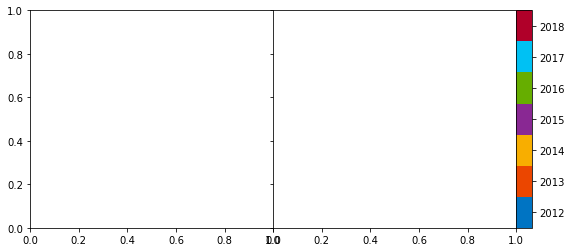

In [40]:
fig, axs, cax = make_cool_grid()

# Plots

## N50

In [47]:
l = [1]
l*3

[1, 1, 1]

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.7534676145376821
intercept: [940.2133]
slope: [[468.13144]]
coefficient of determination: 0.7806041080897806
intercept: [893.1227]
slope: [[538.9437]]
coefficient of determination: 0.21250801455223212
intercept: [975.40316072]
slope: [[122.18107337]]


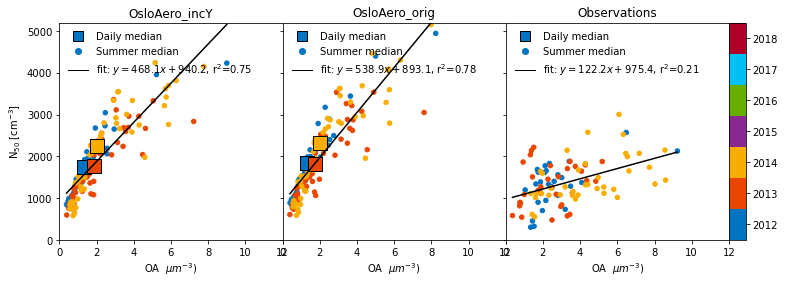

In [52]:

fig, axs, cax = make_cool_grid(ncols=3)
#add_cbar(cax)


v_x = 'OA'

v_y = 'N50'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]

ylims = [0,5200]
xlab = 'OA  $\mu m^{-3}$)'

ylab = r'N$_{50}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incY')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False)

#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab,
                      add_cbar=False)
ax.set_title('Observations')






fn = make_fn_scat(cases_inc_Y[0], v_x,v_y)

fig.savefig(fn, dpi=150)


plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.7534676145376821
intercept: [940.2133]
slope: [[468.13144]]
coefficient of determination: 0.7806041080897806
intercept: [893.1227]
slope: [[538.9437]]
coefficient of determination: 0.21250801455223212
intercept: [975.40316072]
slope: [[122.18107337]]


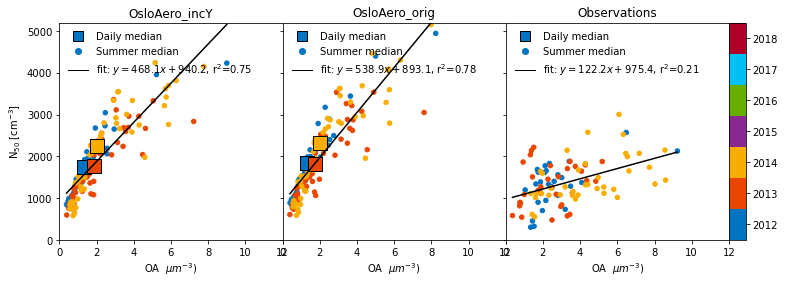

In [59]:

#fig, axs = plt.subplots(1,3, figsize=[18,4], sharey=True,)

fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'OA'


v_y = 'N50'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]

ylims = [0,5200]
xlab = 'OA  $\mu m^{-3}$)'

ylab = r'N$_{50}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       add_cbar=False,
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incY')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7], ax = axs[1],
                       add_cbar=False,
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       add_cbar=False,
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(cases_inc_Y[0], v_x,v_y)

fig.savefig(fn, dpi=150)


plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.6588134703647948
intercept: [-1675.4114]
slope: [[201.62018]]
coefficient of determination: 0.6284432258646332
intercept: [-1904.303]
slope: [[219.84451]]
coefficient of determination: 0.24181045967315273
intercept: [-19.98884896]
slope: [[82.34048867]]


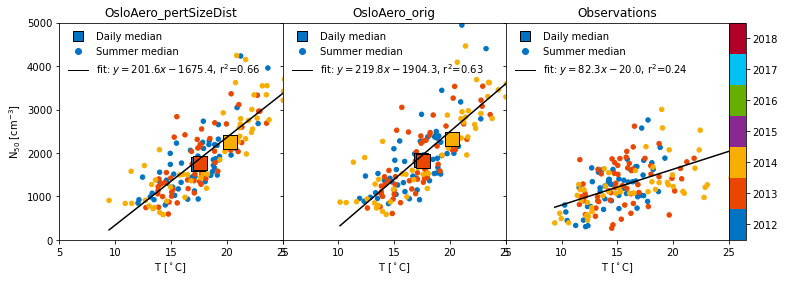

In [63]:

#fig, axs = plt.subplots(1,3, figsize=[18,4], sharey=True,)

fig, axs, cax = make_cool_grid(ncols=3)
v_x = 'T_C'

v_y = 'N50'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,25]

ylims = [0,5000]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{50}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_pertSizeDist')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

## Log scale

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.6544752275990688
intercept: [2.4008183]
slope: [[0.04712199]]
coefficient of determination: 0.6432728486615702
intercept: [2.3889508]
slope: [[0.04872841]]
coefficient of determination: 0.2547031850430267
intercept: [2.54679112]
slope: [[0.03288241]]


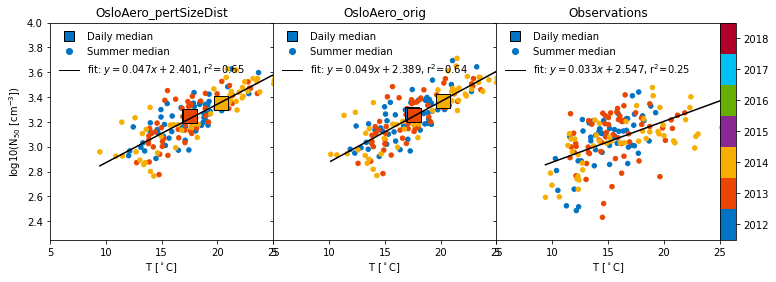

In [64]:

fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'T_C'

v_y = 'log10(N50)'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,25]

ylims = [2.25,4]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'log10(N$_{50}$ [cm$^{-3}$])'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_pertSizeDist')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.5999900127372157
intercept: [-0.9884694]
slope: [[0.06746963]]
coefficient of determination: 0.5969880678783017
intercept: [-0.9861069]
slope: [[0.06727856]]
coefficient of determination: 0.5795063936963543
intercept: [-0.64915962]
slope: [[0.06379358]]


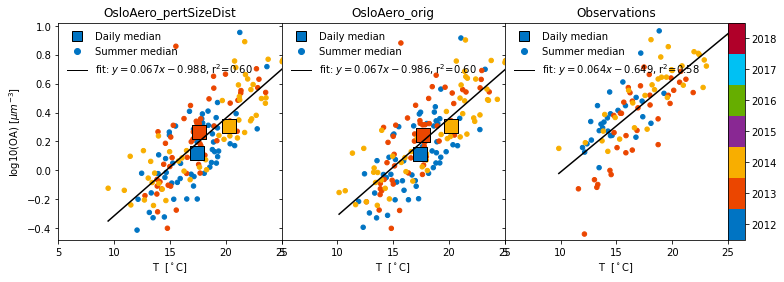

In [65]:


fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'T_C'

v_y = 'log10(OA)'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,25]

ylims = None# [0,5000]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T  [$^\circ$C]'

ylab = r'log10(OA) [$\mu m^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_pertSizeDist')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_y = 'log10(OA (microgram m^-3))'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

## N100

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.9303567756772869
intercept: [16.057983]
slope: [[269.78247]]
coefficient of determination: 0.9155126686309198
intercept: [-0.08435059]
slope: [[287.0455]]
coefficient of determination: 0.6976539549424847
intercept: [206.24849989]
slope: [[151.82108814]]


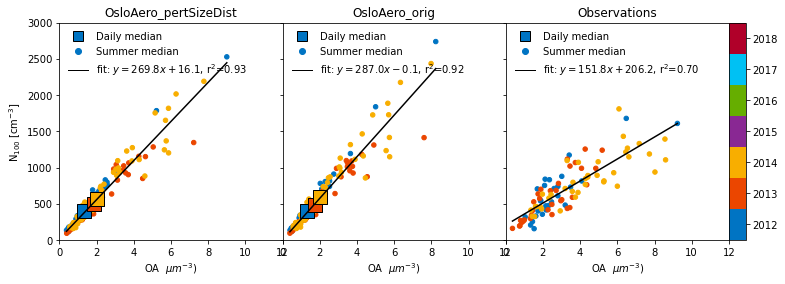

In [66]:



fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'OA'

v_y = 'N100'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]

ylims = [0,3000]
xlab = 'OA  $\mu m^{-3}$)'

ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_pertSizeDist')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(cases_inc_Y[0], v_x,v_y)

fig.savefig(fn, dpi=150)


plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.5239080848096852
intercept: [-1086.1943]
slope: [[93.24674]]
coefficient of determination: 0.5082142758386565
intercept: [-1139.3674]
slope: [[97.229164]]
coefficient of determination: 0.4900974606886648
intercept: [-568.01323953]
slope: [[75.16495409]]


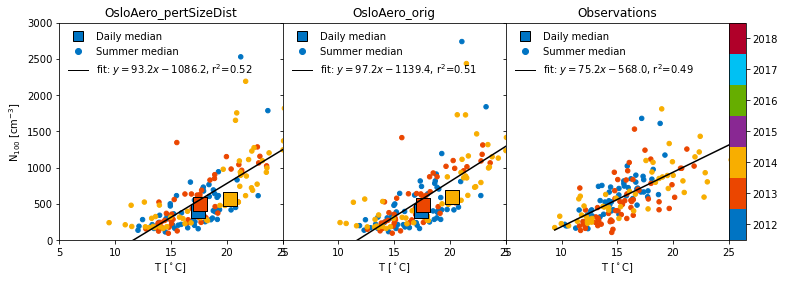

In [67]:


fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'T_C'

v_y = 'N100'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,25]

ylims = [0,3000]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{100}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_pertSizeDist')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

## N150

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.9623507267351895
intercept: [-20.505249]
slope: [[83.87252]]
coefficient of determination: 0.9570204700825625
intercept: [-19.825668]
slope: [[82.71306]]
coefficient of determination: 0.8553765313148871
intercept: [43.4164382]
slope: [[99.73602557]]


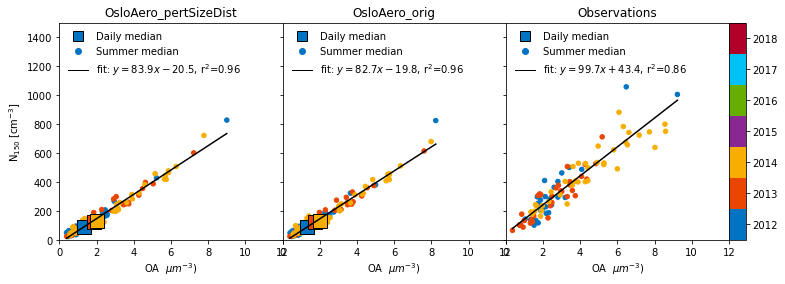

In [68]:



fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'OA'

v_y = 'N150'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]

ylims = [0,1500]
xlab = 'OA  $\mu m^{-3}$)'

ylab = r'N$_{150}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_pertSizeDist')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')

fn = make_fn_scat(cases_inc_Y[0], v_x,v_y)

fig.savefig(fn, dpi=150)

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.3628011303287242
intercept: [-270.1407]
slope: [[23.71944]]
coefficient of determination: 0.3491169672085789
intercept: [-254.457]
slope: [[22.711899]]
coefficient of determination: 0.48373642394716776
intercept: [-357.46943356]
slope: [[42.88722566]]


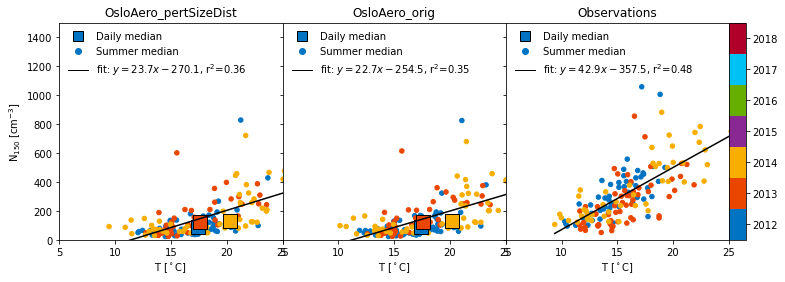

In [69]:

fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'T_C'

v_y = 'N150'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,25]

ylims = [0,1500]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{150}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_pertSizeDist')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

## N200

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.8831249074367449
intercept: [-5.076912]
slope: [[30.64133]]
coefficient of determination: 0.8532595226690711
intercept: [-2.3412209]
slope: [[28.147448]]
coefficient of determination: 0.8658705798362926
intercept: [6.35852648]
slope: [[55.3248923]]


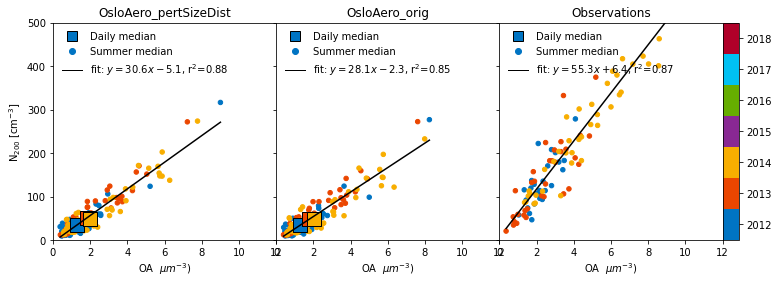

In [70]:


fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'OA'

v_y = 'N200'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [0,12]

ylims = [0,500]
xlab = 'OA  $\mu m^{-3}$)'

ylab = r'N$_{200}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_pertSizeDist')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')

fn = make_fn_scat(cases_inc_Y[0], v_x,v_y)

fig.savefig(fn, dpi=150)

plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.2543940719278851
intercept: [-77.019394]
slope: [[7.5747323]]
coefficient of determination: 0.22314936366919513
intercept: [-61.269848]
slope: [[6.5441136]]
coefficient of determination: 0.4334426018708696
intercept: [-186.28003389]
slope: [[21.92337005]]


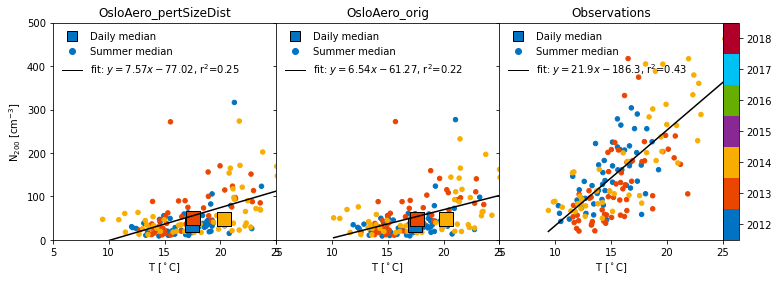

In [71]:

fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'T_C'

v_y = 'N200'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
xlims = [5,25]

ylims = [0,500]
# xlab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = r'N$_{200}$ [cm$^{-3}$]'
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_pertSizeDist')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_x = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')


plt.show()

## OA vs temperature:

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.4820414031769098
intercept: [-3.6293027]
slope: [[0.3197859]]
coefficient of determination: 0.4795122248277487
intercept: [-3.5468862]
slope: [[0.3148142]]
coefficient of determination: 0.550104536875424
intercept: [-4.10142489]
slope: [[0.43023124]]


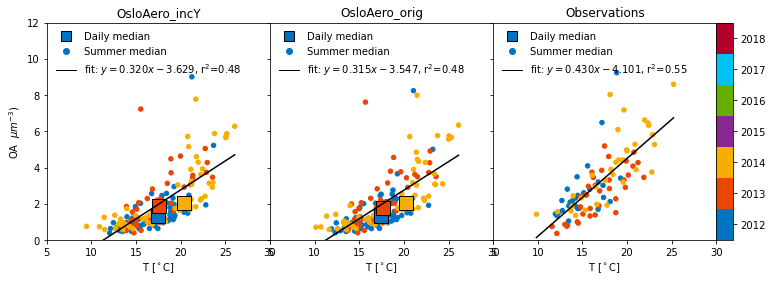

In [72]:


fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'T_C'

v_y = 'OA'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
ylims = [0,12]

xlims = [5,30]
ylab = 'OA  $\mu m^{-3}$)'
xlab = r'T [$^\circ$C]'

ylab = 'OA  $\mu m^{-3}$)'

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incY')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_y = 'OA (microgram m^-3)'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(cases_inc_Y[0], v_x,v_y)

fig.savefig(fn, dpi=150)


plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


coefficient of determination: 0.5999900127372157
intercept: [-0.9884694]
slope: [[0.06746963]]
coefficient of determination: 0.5969880678783017
intercept: [-0.9861069]
slope: [[0.06727856]]
coefficient of determination: 0.5795063936963543
intercept: [-0.64915962]
slope: [[0.06379358]]


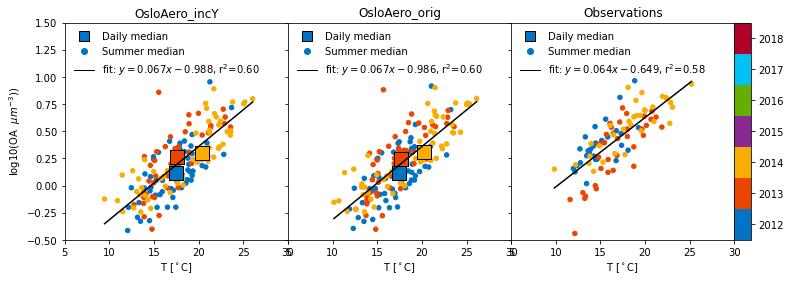

In [73]:


fig, axs, cax = make_cool_grid(ncols=3)

v_x = 'T_C'

v_y = 'log10(OA)'
ca = cases_inc_Y[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
ylims = [-.5,1.5]

xlims = [5,30]
ylab = 'log(OA  $\mu m^{-3}$))'
xlab = r'T [$^\circ$C]'

ylab = 'log10(OA  $\mu m^{-3}$))'

fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[0],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_incY')

ca = cases_orig[0]
df_s = dic_df[ca][mask_obs_N].loc['2012':]

df_sy = dic_df_sm[ca].loc['2012':]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca,xlims=xlims,
                       figsize=[6,7],ax = axs[1],
                       ylims=ylims, xlab=xlab, ylab = ylab)
#ax.hlines(2000, 5,30, color='k', linewidth=1)
ax.set_title('OsloAero_orig')

v_y = 'log10(OA (microgram m^-3))'
v_x = 'T (degree C)'

ca ='OBS'
df_s = df_joint_hyy.loc['2012':'2014']

df_sy = None#df_joint_hyy.loc['2012':'2014'] #f_hyy_1.resample('Y').median()
#xlims = [5,30]
#ylims = [0,2000]
fig, ax = plot_scatter(v_x,v_y, df_s, df_sy, ca, ax = axs[2],
                       xlims=xlims, ylims=ylims, xlab=xlab, ylab = ylab)
ax.set_title('Observations')
fn = make_fn_scat(cases_inc_Y[0], v_x,v_y)

fig.savefig(fn, dpi=150)


plt.show()